In [1]:
%load_ext autoreload
%autoreload 2

import logging
import matplotlib as mpl
import matplotlib.pyplot as plt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import defi.dao_cross.supply_demand as ddcrsede
import defi.dao_cross.order as ddacrord

In [2]:
hdbg.init_logger(verbosity=logging.DEBUG)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-2e77e8cf-ec54-4280-9414-45c0657dfdf3.json'
DEBUG Effective logging level=10
DEBUG Shut up 28 modules: matplotlib.lines, matplotlib.axes, matplotlib.dviread, matplotlib.axes._axes, matplotlib.font_manager, matplotlib.dates, matplotlib.image, matplotlib._constrained_layout, matplotlib, matplotlib.backend_bases, matplotlib.text, matplotlib.axes._base, matplotlib.texmanager, matplotlib.category, matplotlib._layoutgrid, matplotlib.ticker, matplotlib.colorbar, matplotlib._afm, matplotlib.axis, matplotlib.pyplot, matplotlib.style.core, matplotlib.mathtext, matplotlib.artist, matplotlib.style, matplotlib.figure, asyncio, matplotlib.textpath, matplotlib.gridspec
DEBUG > (cd . && cd "$(git rev-parse --show-toplevel)/.." && (git rev-parse --is-inside-work-tree | grep -q true)) 2>&1
DEBUG > (git rev-parse --show-toplevel) 2>&1
-----------------------------------------------------------

# Get linear supply / demand orders

In [3]:
alpha = 2.0
beta = 10.0
n_orders = 10
linear_supply_orders = ddcrsede.get_linear_supply_orders(alpha, beta, n_orders)
ddacrord.convert_orders_to_dataframe(linear_supply_orders)

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-04-27 11:19:52.673170+00:00,sell,2.501076,BTC,15.002151,ETH,4
1,2023-04-27 11:19:52.673270+00:00,sell,0.478646,BTC,15.959444,ETH,4
2,2023-04-27 11:19:52.673282+00:00,sell,5.714161,BTC,27.387767,ETH,9
3,2023-04-27 11:19:52.673291+00:00,sell,13.627191,BTC,54.642148,ETH,10
4,2023-04-27 11:19:52.673298+00:00,sell,5.181858,BTC,65.005864,ETH,1
5,2023-04-27 11:19:52.673477+00:00,sell,14.68925,BTC,94.384364,ETH,9
6,2023-04-27 11:19:52.673486+00:00,sell,21.750498,BTC,137.88536,ETH,4
7,2023-04-27 11:19:52.673495+00:00,sell,3.727269,BTC,145.339897,ETH,9
8,2023-04-27 11:19:52.673502+00:00,sell,5.977173,BTC,157.294243,ETH,7
9,2023-04-27 11:19:52.673510+00:00,sell,15.570835,BTC,188.435914,ETH,4


In [4]:
alpha = -2.0
beta = 210.0
n_orders = 10
linear_demand_orders = ddcrsede.get_linear_demand_orders(alpha, beta, n_orders)
ddacrord.convert_orders_to_dataframe(linear_demand_orders)

,timestamp,action,quantity,base_token,limit_price,quote_token,deposit_address
0,2023-04-27 11:19:52.723622+00:00,buy,2.626129,BTC,204.747741,ETH,4
1,2023-04-27 11:19:52.723672+00:00,buy,0.502579,BTC,203.742584,ETH,4
2,2023-04-27 11:19:52.723685+00:00,buy,5.999869,BTC,191.742845,ETH,9
3,2023-04-27 11:19:52.723695+00:00,buy,14.30855,BTC,163.125745,ETH,10
4,2023-04-27 11:19:52.723703+00:00,buy,5.440951,BTC,152.243843,ETH,1
5,2023-04-27 11:19:52.723712+00:00,buy,15.423713,BTC,121.396418,ETH,9
6,2023-04-27 11:19:52.723721+00:00,buy,22.838023,BTC,75.720372,ETH,4
7,2023-04-27 11:19:52.723730+00:00,buy,3.913632,BTC,67.893108,ETH,9
8,2023-04-27 11:19:52.723757+00:00,buy,6.276031,BTC,55.341045,ETH,7
9,2023-04-27 11:19:52.723767+00:00,buy,16.349377,BTC,22.642291,ETH,4


# Get curves

In [5]:
supply_curve = ddcrsede.get_curve_dots(linear_supply_orders, "supply")
supply_curve

[(0, 15.002151044533388),
 (2.5010755222666936, 15.002151044533388),
 (2.5010755222666936, 15.959443887614068),
 (2.9797219438070344, 15.959443887614068),
 (2.9797219438070344, 27.38776652588323),
 (8.693883262941615, 27.38776652588323),
 (8.693883262941615, 54.64214762976455),
 (22.321073814882276, 54.64214762976455),
 (22.321073814882276, 65.00586367382385),
 (27.502931836911927, 65.00586367382385),
 (27.502931836911927, 94.38436393705409),
 (42.192181968527045, 94.38436393705409),
 (42.192181968527045, 137.88535969157675),
 (63.942679845788376, 137.88535969157675),
 (63.942679845788376, 145.33989748458225),
 (67.66994874229113, 145.33989748458225),
 (67.66994874229113, 157.29424283280247),
 (73.64712141640123, 157.29424283280247),
 (73.64712141640123, 188.43591354096907),
 (89.21795677048453, 188.43591354096907),
 (89.21795677048453, 235.54489192621133)]

In [6]:
demand_curve = ddcrsede.get_curve_dots(linear_demand_orders, "demand")
demand_curve

[(0, 204.74774140323996),
 (2.6261292983800284, 204.74774140323996),
 (2.6261292983800284, 203.74258391800524),
 (3.128708040997386, 203.74258391800524),
 (3.128708040997386, 191.7428451478226),
 (9.128577426088697, 191.7428451478226),
 (9.128577426088697, 163.12574498874721),
 (23.43712750562639, 163.12574498874721),
 (23.43712750562639, 152.24384314248496),
 (28.878078428757522, 152.24384314248496),
 (28.878078428757522, 121.39641786609322),
 (44.30179106695339, 121.39641786609322),
 (44.30179106695339, 75.7203723238444),
 (67.1398138380778, 75.7203723238444),
 (67.1398138380778, 67.89310764118864),
 (71.05344617940568, 67.89310764118864),
 (71.05344617940568, 55.341045025557406),
 (77.3294774872213, 55.341045025557406),
 (77.3294774872213, 22.642290781982467),
 (93.67885460900877, 22.642290781982467),
 (93.67885460900877, 0)]

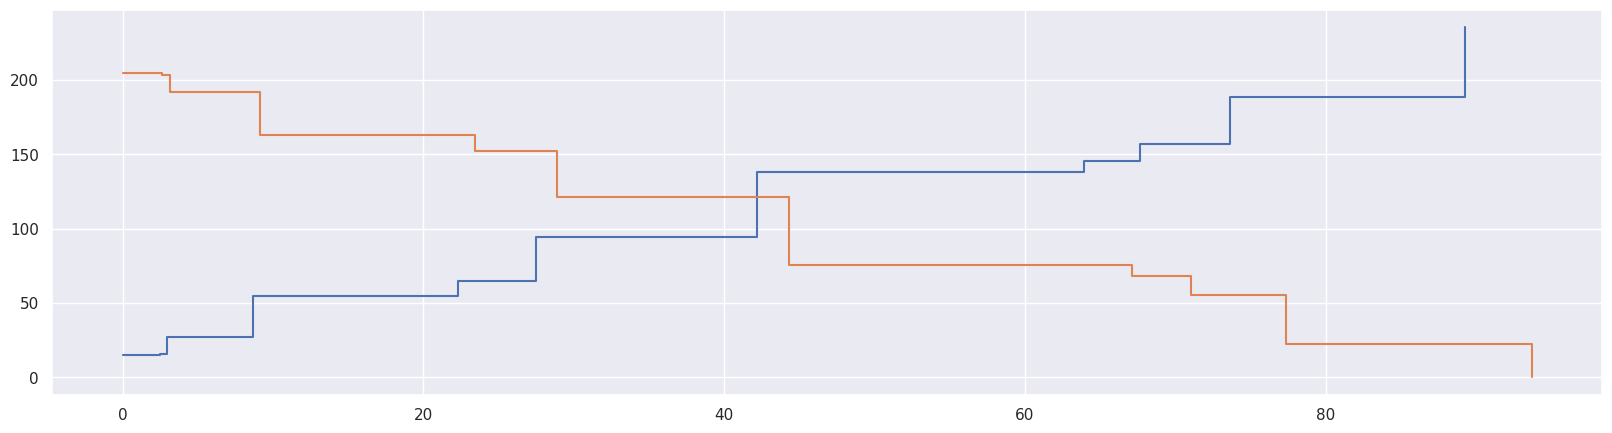

In [7]:
plt.plot(*zip(*supply_curve))
plt.plot(*zip(*demand_curve))
plt.show()